### Early Stopping

In [28]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_moons


In [29]:
X, y=make_moons()

In [30]:
X

array([[ 1.59599895e-01,  9.87181783e-01],
       [ 9.49055747e-01,  3.15108218e-01],
       [ 1.83808810e+00, -4.55349012e-02],
       [ 1.94905575e+00,  1.84891782e-01],
       [ 1.76144596e+00, -1.48228395e-01],
       [-9.00968868e-01,  4.33883739e-01],
       [-5.72116660e-01,  8.20172255e-01],
       [ 7.30832427e-02,  1.24732995e-01],
       [ 3.45365054e-01,  9.38468422e-01],
       [-6.23489802e-01,  7.81831482e-01],
       [-1.59599895e-01,  9.87181783e-01],
       [ 4.04783343e-01,  9.14412623e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [-9.49055747e-01,  3.15108218e-01],
       [-3.45365054e-01,  9.38468422e-01],
       [ 0.00000000e+00,  5.00000000e-01],
       [ 1.99179001e+00,  3.72122838e-01],
       [ 2.84527587e-01,  9.58667853e-01],
       [ 9.90311321e-02,  6.61162609e-02],
       [ 9.67294863e-01,  2.53654584e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 3.27051370e-02,  2.46345416e-01],
       [ 6.54634946e-01, -4.38468422e-01],
       [ 1.

In [31]:
y

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model =Sequential()
model.add(Dense(2, activation="relu",input_dim =2))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [34]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [25]:


hsit =model.fit(x_train, y_train,  validation_split=0.2,epochs=1000)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.6854 - val_loss: 0.6851
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6832 - val_loss: 0.6838
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6808 - val_loss: 0.6826
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6793 - val_loss: 0.6815
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6745 - val_loss: 0.6802
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6722 - val_loss: 0.6791
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6739 - val_loss: 0.6779
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6732 - val_loss: 0.6767
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6718 - val_loss: 0.6756
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6698 - val_loss: 0.6744
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6678 - val_loss: 0.6732
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.

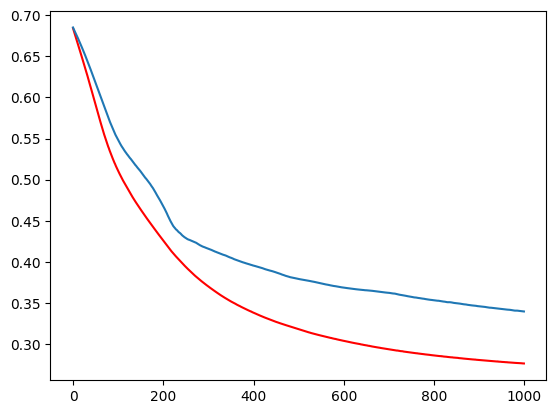

In [26]:
import matplotlib.pyplot as plt
plt.plot(hsit.history["loss"], color ="red")
plt.plot(hsit.history["val_loss"])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

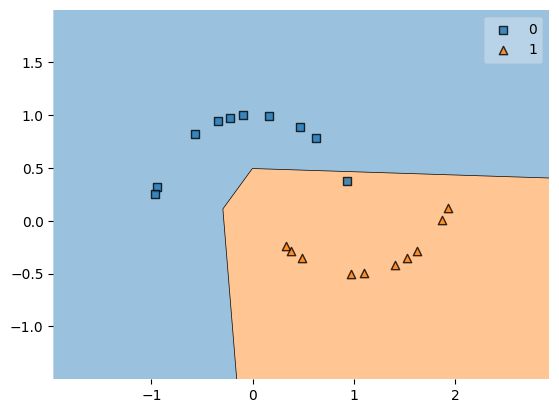

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test, y_test.ravel(), clf =model)

### Early Stopping

In [35]:
cb =EarlyStopping(
    monitor="val_loss",
    min_delta=0.000001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
   
)

hsit =model.fit(x_train, y_train,  validation_split=0.2, callbacks=cb, epochs=1000)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.6833 - val_loss: 0.6896
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6833 - val_loss: 0.6889
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6824 - val_loss: 0.6881
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6779 - val_loss: 0.6874
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6782 - val_loss: 0.6867
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6832 - val_loss: 0.6860
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6775 - val_loss: 0.6853
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6765 - val_loss: 0.6846
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6778 - val_loss: 0.6839
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6769 - val_loss: 0.6832
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6728 - val_loss: 0.6825
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.

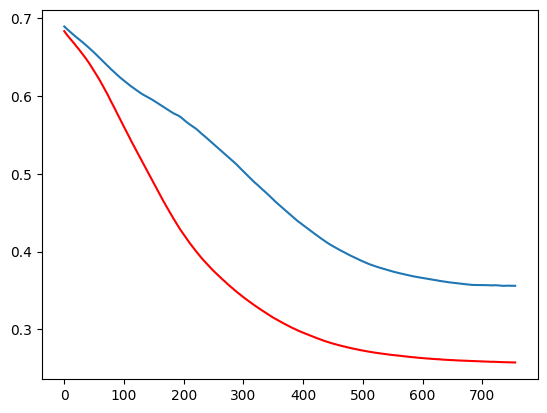

In [36]:
import matplotlib.pyplot as plt
plt.plot(hsit.history["loss"], color ="red")
plt.plot(hsit.history["val_loss"])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

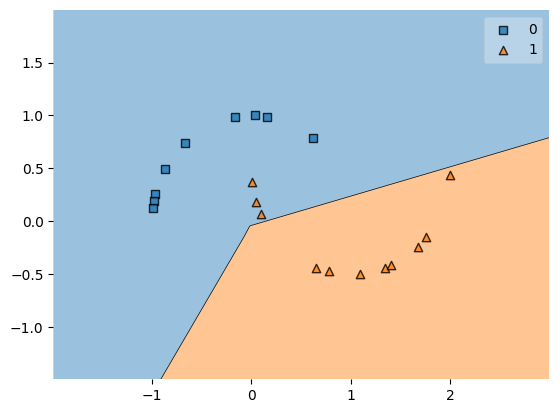

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test, y_test.ravel(), clf =model)